# sunekutools.viz visualization tools

In [1]:
%autosave 0
%matplotlib inline
import sunekutools as st

Autosave disabled


## Timeseries plots
using excerpts from <a href="https://data.ny.gov/Energy-Environment/Electric-Generation-By-Fuel-Type-GWh-Beginning-196/h4gs-8qnu">NY State energy production data</a>

In [2]:
# Each column is a TimeSeries of energy production for a specific type of source
Energy = st.pd.read_csv('Energy.csv').drop('Total',axis=1)
Energy = Energy.set_index('Year').sort_index()

# Let's consolidate these into fewer columns
Energy['Hydro'] = Energy['ConvHydro'].fillna(0) + Energy['PsHydro'].fillna(0)
Energy['AllOther'] = Energy[['Other','Waste','LFG','Wood','Wind','Solar']].sum(axis=1)

keep_cols = ['Coal','Hydro','NaturalGas','Nuclear','Petroleum','NetImports','AllOther']
Energy = Energy[keep_cols]
Energy.tail()

,Coal,Hydro,NaturalGas,Nuclear,Petroleum,NetImports,AllOther
Year,,,,,,,
2008,19154,27501.0,43856,43209,3745,23900,4247.0
2009,12759,27945.0,41780,43485,2648,25009,5154.0
2010,13583,25103.0,48916,41870,2005,26517,5512.0
2011,9426,28355.0,50805,42695,1189,25202,5658.0
2012,4551,25303.0,59462,40775,580,26182,5989.0


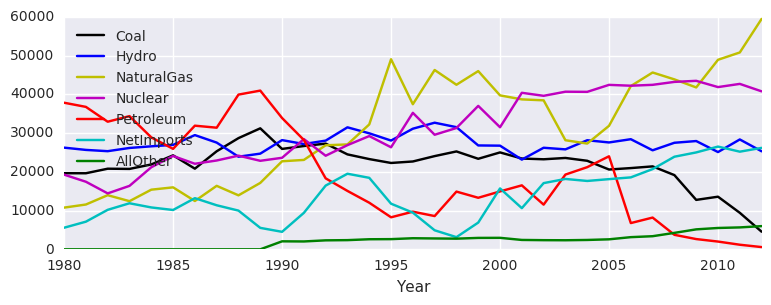

In [3]:
# Pandas makes nice TimeSeries plots by default
col_color = ['k','b','y','m','r','c','g']
Energy.plot(figsize=(9,3),color=col_color)

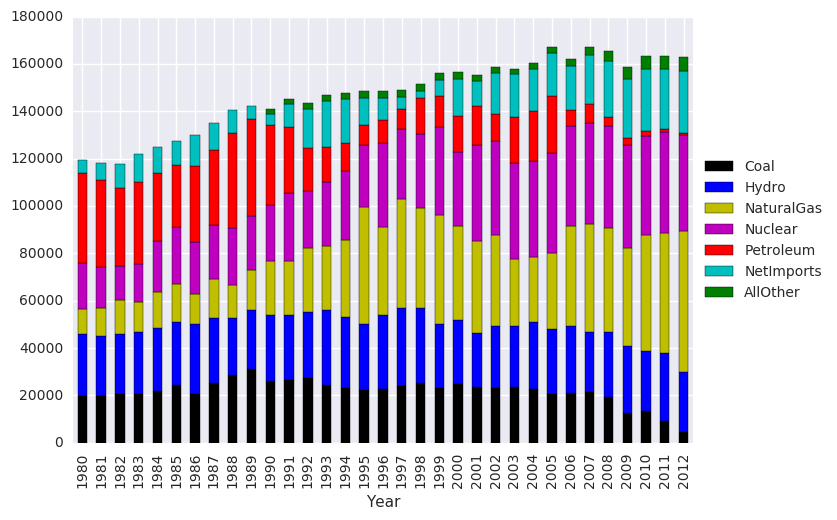

In [4]:
# Show all energy sources as a stacked bar plot. Move the legend outside the plot.
Energy.plot(kind='bar',stacked=True,color=col_color).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

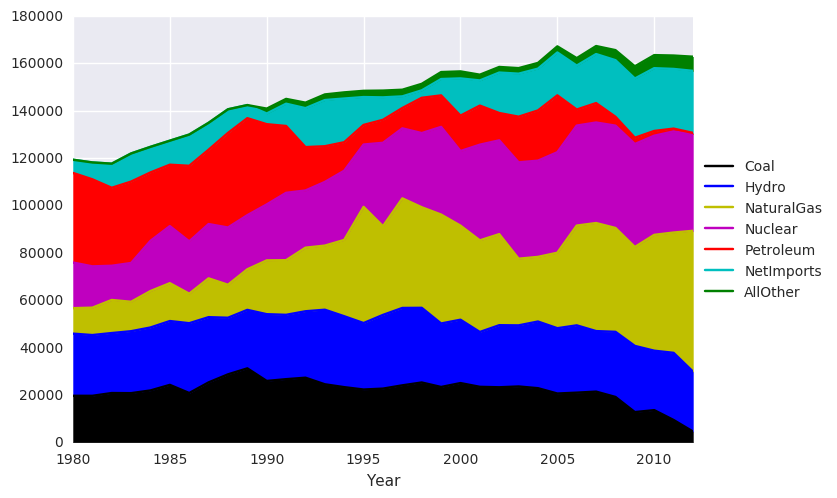

In [5]:
# Area plots are somewhat like stacked bar plots with the bars blurred together
Energy.plot.area(color=col_color).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

## Histograms and boxplots
using excerpts from <a href="https://data.ny.gov/Transportation/Annual-Average-Daily-Traffic-AADT-Beginning-1977/6amx-2pbv">NY annual average daily traffic</a>

In [6]:
# Load NY traffic data
Traffic = st.pd.read_csv('Traffic.csv').rename(columns={'AADT':'Traffic'})
Traffic.head()

,Unnamed: 0,Year,RC_ID,Region,GIS Code,Ramp,Begin Milepoint,End Milepoint,Roadway Begin Description,Roadway End Description,Municipality,Signing,Route Number,Road Name,Traffic,Count Type
0,11192,2014,01_0001,11,10070602.0,N,0.00,0.07,NY/BRONX CO LINE,RT 87I MAJ DEGAN EXPY UNDER,NEW YORK CITY,INTERNY,95,NaN,121092,FORECAST
1,11193,2014,01_0002,11,10070602.0,N,0.07,0.58,RT 87I MAJ DEGAN EXPY UNDER,MACOMBS RD OVER,NEW YORK CITY,INTERNY,95,NaN,125581,FORECAST
2,11194,2014,01_0003,11,10070602.0,N,0.58,1.21,MACOMBS RD OVER,END 1/95I OLAP WEBSTER AVE,NEW YORK CITY,INTERNY,95,NaN,162758,FORECAST
3,11195,2014,01_0004,11,10001102.0,N,1.21,2.71,END 1/95I OLAP WEBSTER AVE,E FORDHAM RD,NEW YORK CITY,US,1,WEBSTER AVE,16106,FORECAST
4,11196,2014,01_0005,11,10001102.0,N,2.71,3.83,E FORDHAM RD,RT 907H BRONX RIVER PKWY SOU,NEW YORK CITY,US,1,E FORDHAM RD,35426,FORECAST


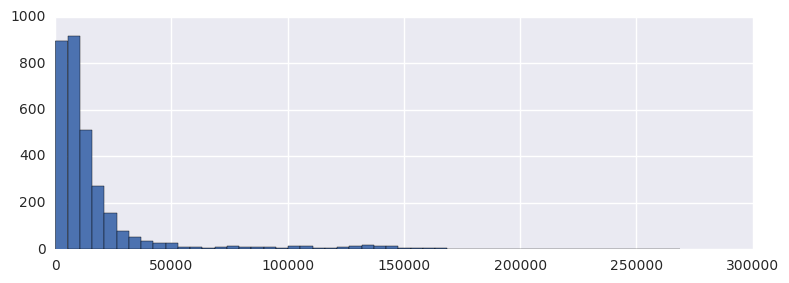

In [7]:
# Histogram of traffic counts during 2014
s = Traffic.loc[ Traffic['Year'] == 2014, 'Traffic' ]
s.hist(bins=51,figsize=(9,3))

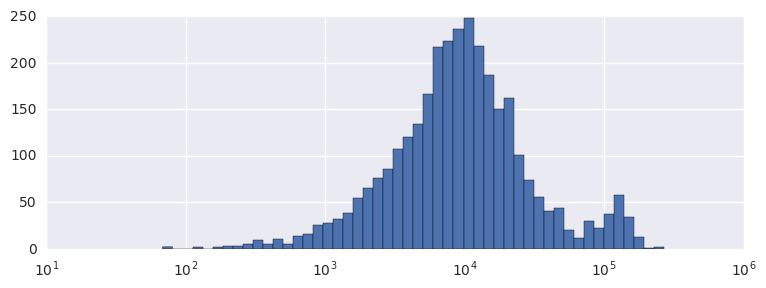

In [8]:
# Same histogram, but with logarithmic bins
st.viz.log_hist(s,nBins=51,figsize=(9,3))

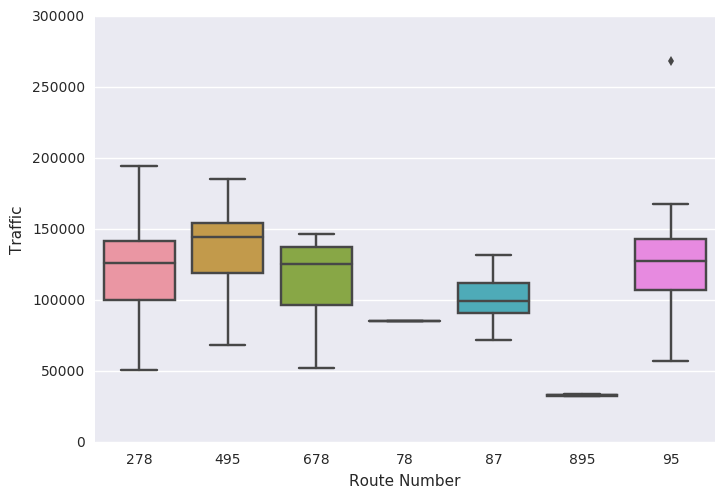

In [9]:
# Group by route number and show boxplots for selected groups.
# ('Route Number' is a string, not a number, in this dataset.)
fInterstate = Traffic['Route Number'].isin(['78','87','95','278','495','678','895'])
st.seaborn.boxplot(x='Route Number',y='Traffic',data=Traffic[fInterstate])

## Quantile flow plots (contour plots of time-varying histograms)
using *Zonal annual means* data from [data.giss.nasa.gov](http://data.giss.nasa.gov/gistemp/)

In [10]:
# Get temperature data for each zone and each year.
# Don't include aggregated regions.
ZonalTemp = st.pd.read_csv('ZonalTempAnomaly.csv',index_col='Year')
ZonalTemp = ZonalTemp.drop(['Glob','NHem','SHem'],axis=1)
ZonalTemp.head()

,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
Year,,,,,,,,,,,
1880,-0.42,-0.15,-0.06,-1.06,-0.61,-0.21,-0.23,-0.07,-0.02,-0.08,0.34
1881,-0.32,-0.01,-0.06,-0.80,-0.47,-0.14,-0.03,0.01,-0.06,-0.02,0.32
1882,-0.25,-0.09,0.03,-1.49,-0.26,-0.02,-0.09,-0.09,0.03,0.08,0.36
1883,-0.37,-0.21,-0.02,-0.42,-0.62,-0.19,-0.22,-0.21,-0.01,0.00,0.32
1884,-0.58,-0.17,-0.12,-1.39,-0.62,-0.40,-0.18,-0.15,-0.15,-0.05,0.35


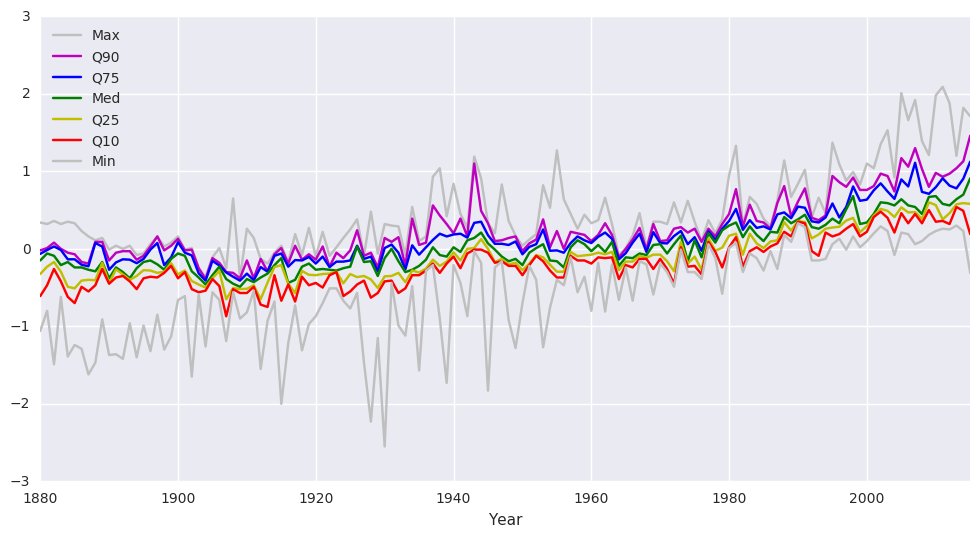

In [11]:
# Show quantiles for each year
st.viz.quantile_flow(ZonalTemp,figsize=(12,6))

## Parallel coordinate plots and stacked histograms
using <a href='http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html'>Fisher's Iris dataset</a>

In [12]:
Iris = st.pd.read_csv('Iris.csv')
st.afew(Iris)

,sepal length,sepal width,petal length,petal width,Class
7,5.0,3.4,1.5,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
65,6.7,3.1,4.4,1.4,versicolor
82,5.8,2.7,3.9,1.2,versicolor
106,4.9,2.5,4.5,1.7,virginica
108,6.7,2.5,5.8,1.8,virginica
122,7.7,2.8,6.7,2.0,virginica
140,6.7,3.1,5.6,2.4,virginica


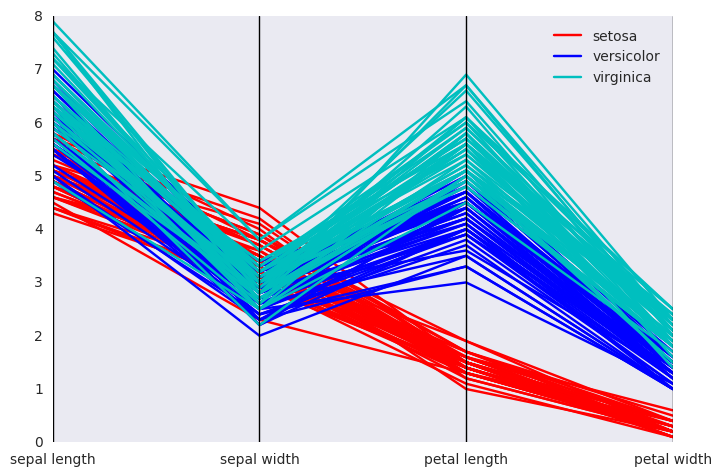

In [13]:
# The pandas parallel-coordinates plot might help reveal patterns quickly
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(Iris,'Class',color=['r','b','c'])

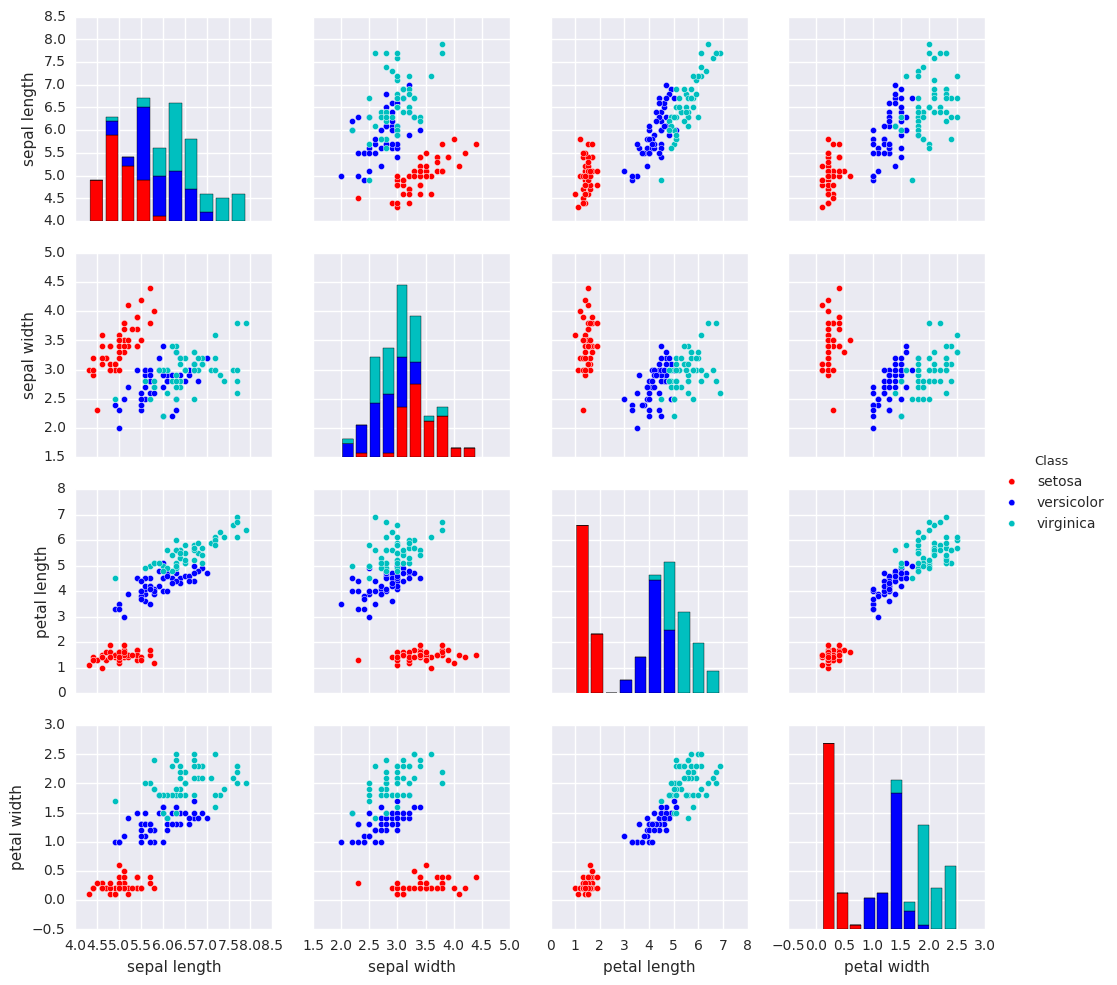

In [14]:
# Seaborn's pairplot() shows stacked histograms for each numeric column,
# and also a scatterplot of each pair of numeric columns.
# This helps show which columns are strongly related to each other.
# Color by class to see if we can classify "by eyeball".
st.seaborn.pairplot(Iris,hue='Class',palette=['r','b','c'])

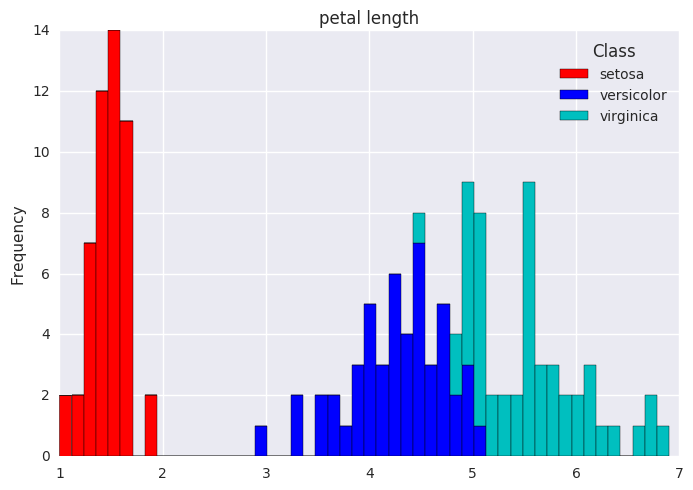

In [15]:
# Stacked histogram colored by target variable (similar to diagonal elements of pairplot)
st.viz.hist_stack(Iris['petal length'],Iris['Class'],color=['r','b','c'],bins=50)

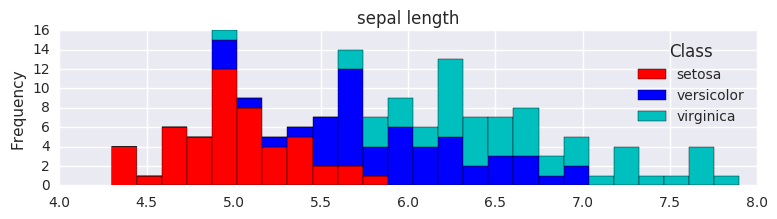

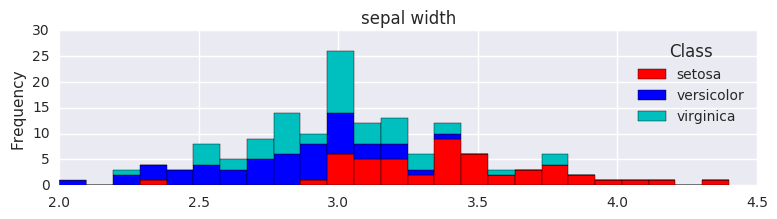

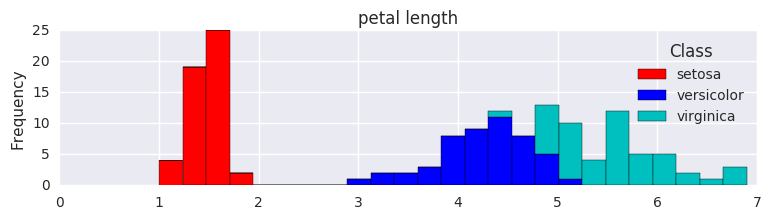

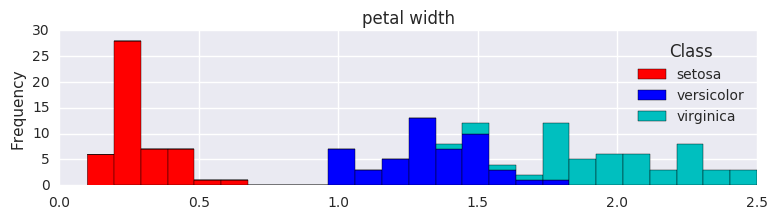

In [16]:
# Stacked histograms of all predictor columns in [Iris] data matrix
st.viz.hist_stack_multi(Iris,'Class',color=['r','b','c'],figsize=(9,2),bins=25)